# Q2: Water treatment water data and pH value
## 1. Data exploration: Find correlation between input and output parameter values. Example: pH-E and pH-S.

In [225]:
#Load Data into DataFrame
import pandas as pd
import numpy as np
# Load data into Dataframe 
csvData = pd.read_csv('water-treatment.data')
csvData.head()

,date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


### Following parameters need to be considered for correlation and for the classification

#### 1 Q-E (input flow to plant)
#### 2 ZN-E (input Zinc to plant)
#### 3 PH-E (input pH to plant)
#### 4 DBO-E (input Biological demand of oxygen to plant)
#### 5 DQO-E (input chemical demand of oxygen to plant)
#### 6 SS-E (input suspended solids to plant)
#### 7 SSV-E (input volatile supended solids to plant)
#### 8 SED-E (input sediments to plant)
#### 9 COND-E (input conductivity to plant)
#### 23 PH-S (output pH)
#### 24 DBO-S (output Biological demand of oxygen)
#### 25 DQO-S (output chemical demand of oxygen)
#### 26 SS-S (output suspended solids)
#### 27 SSV-S (output volatile supended solids)
#### 28 SED-S (output sediments)
#### 29 COND-S (output conductivity)

In [226]:
# Dropping other columns which are not mentioned in the list above.
waterdata_specific_columns = pd.DataFrame(csvData, columns = ['Q-E','ZN-E','PH-E','DBO-E','DQO-E','SS-E','SSV-E','SED-E','COND-E','PH-S','DBO-S','DQO-S','SS-S','SSV-S','SED-S','COND-S'])
waterdata_specific_columns.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
0,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.3,?,84,21,81.0,0.02,2000
1,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.5,?,91,17,94.1,0.00,2590
2,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.6,?,128,21,81,0.05,1888
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.6,20,104,20,96.7,0.00,1840
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.6,19,108,22,65.9,0.02,2120


In [228]:
#Filling null values using fillna - Forward Padding 
for column in ['Q-E','ZN-E','DBO-E','DQO-E','SS-E','SSV-E','SED-E','PH-S','DBO-S','DQO-S','SS-S','SSV-S','SED-S','COND-S']:
    waterdata_specific_columns[column].replace({"?": np.nan}, inplace=True)
    print(column,waterdata_specific_columns[column].isnull().sum())
waterdata_specific_columns = waterdata_specific_columns.fillna(method='pad')    
waterdata_specific_columns['DBO-S'].fillna(20, inplace=True)
waterdata_specific_columns['DBO-E'].fillna(205, inplace=True)
waterdata_specific_columns.head()

Q-E 0
ZN-E 0
DBO-E 0
DQO-E 0
SS-E 0
SSV-E 0
SED-E 0
PH-S 0
DBO-S 0
DQO-S 0
SS-S 0
SSV-S 0
SED-S 0
COND-S 0


,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
0,44101,1.50,7.8,205,407,166,66.3,4.5,2110,7.3,20,84,21,81.0,0.02,2000
1,39024,3.00,7.7,205,443,214,69.2,6.5,2660,7.5,20,91,17,94.1,0.00,2590
2,32229,5.00,7.6,205,528,186,69.9,3.4,1666,7.6,20,128,21,81,0.05,1888
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.6,20,104,20,96.7,0.00,1840
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.6,19,108,22,65.9,0.02,2120


In [231]:
#Changing the type of the columns to float
waterdata_specific_columns.dtypes
for column in waterdata_specific_columns.columns:
    waterdata_specific_columns[column] = waterdata_specific_columns[column].astype(float)
waterdata_specific_columns.dtypes 

Q-E       float64
ZN-E      float64
PH-E      float64
DBO-E     float64
DQO-E     float64
SS-E      float64
SSV-E     float64
SED-E     float64
COND-E    float64
PH-S      float64
DBO-S     float64
DQO-S     float64
SS-S      float64
SSV-S     float64
SED-S     float64
COND-S    float64
dtype: object

In [232]:
#Correlation between input and output
waterdata_specific_columns.corr()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
Q-E,1.000000,0.036101,0.147464,-0.189576,-0.332340,-0.008384,-0.327827,-0.118319,-0.083469,0.041793,-0.002868,-0.082208,-0.025932,-0.128789,0.000496,-0.072146
ZN-E,0.036101,1.000000,-0.011092,0.002655,0.085096,0.091344,-0.102536,0.079847,0.052673,-0.096366,-0.017611,0.007922,-0.066708,0.076608,-0.042605,0.069663
PH-E,0.147464,-0.011092,1.000000,0.222979,0.177341,-0.045714,0.190942,0.050052,0.272851,0.333693,-0.034133,-0.045023,-0.084811,0.105557,-0.024000,0.233733
DBO-E,-0.189576,0.002655,0.222979,1.000000,0.506026,0.123162,0.240610,0.249448,0.211845,0.014203,0.127358,0.180765,0.092175,0.023336,0.045235,0.204986
DQO-E,-0.332340,0.085096,0.177341,0.506026,1.000000,0.286192,0.262062,0.430992,0.308135,-0.022037,0.112463,0.301407,0.075390,0.085336,0.023258,0.275889
SS-E,-0.008384,0.091344,-0.045714,0.123162,0.286192,1.000000,-0.545967,0.576708,0.083472,0.041212,0.017478,0.029556,0.004117,-0.116774,0.024647,0.078518
SSV-E,-0.327827,-0.102536,0.190942,0.240610,0.262062,-0.545967,1.000000,-0.139035,0.165719,-0.074828,0.012698,0.116886,-0.006960,0.348002,-0.023692,0.160525
SED-E,-0.118319,0.079847,0.050052,0.249448,0.430992,0.576708,-0.139035,1.000000,0.191531,0.000056,0.035471,0.056507,-0.006006,0.040553,0.012794,0.160720
COND-E,-0.083469,0.052673,0.272851,0.211845,0.308135,0.083472,0.165719,0.191531,1.000000,0.067294,0.017303,0.148039,0.033485,-0.001119,-0.035716,0.901653
PH-S,0.041793,-0.096366,0.333693,0.014203,-0.022037,0.041212,-0.074828,0.000056,0.067294,1.000000,-0.162025,-0.154318,-0.207883,-0.112362,-0.092550,0.046744


In [138]:
#Setting X and Y for input and output columns accordingly
waterdata_specific_columns.corr().loc[['Q-E','ZN-E','PH-E','DBO-E','DQO-E','SS-E','SSV-E','SED-E','COND-E'],['PH-S','DBO-S','DQO-S','SS-S','SSV-S','SED-S','COND-S']]

,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
Q-E,0.041793,-0.002868,-0.082208,-0.025932,-0.128789,0.000496,-0.072146
ZN-E,-0.096366,-0.017611,0.007922,-0.066708,0.076608,-0.042605,0.069663
PH-E,0.333693,-0.034133,-0.045023,-0.084811,0.105557,-0.024000,0.233733
DBO-E,0.035331,0.124803,0.171308,0.092950,0.013231,0.045424,0.172675
DQO-E,-0.022037,0.112463,0.301407,0.075390,0.085336,0.023258,0.275889
SS-E,0.041212,0.017478,0.029556,0.004117,-0.116774,0.024647,0.078518
SSV-E,-0.074828,0.012698,0.116886,-0.006960,0.348002,-0.023692,0.160525
SED-E,0.000056,0.035471,0.056507,-0.006006,0.040553,0.012794,0.160720
COND-E,0.067294,0.017303,0.148039,0.033485,-0.001119,-0.035716,0.901653


<AxesSubplot:>

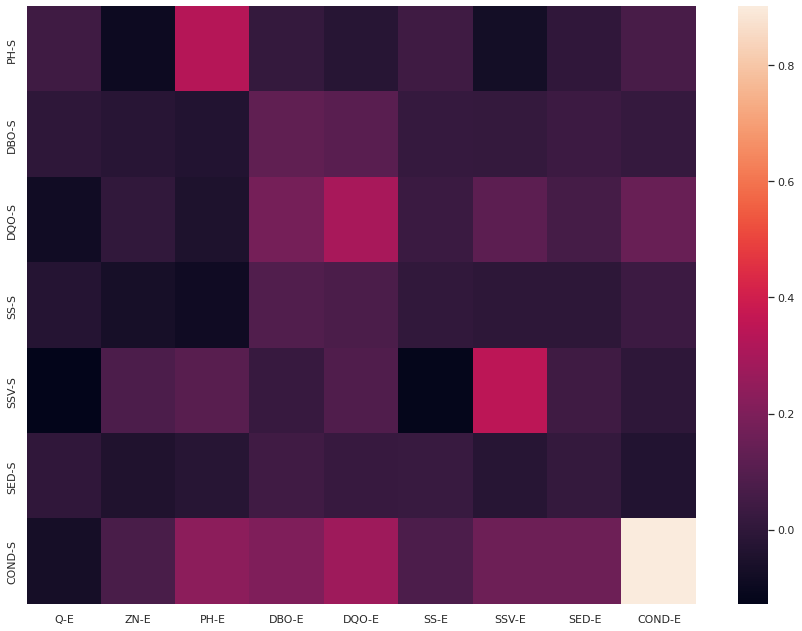

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corelations)

## 2. Data preparation: Add a new column called ‘SAFE-PH-S’. It is ‘yes’ if pH is within 7.0-8.0 and ‘no’ otherwise, i.e., <= 7.0 and > 8.0

In [244]:
#Describing dataframe to validate min and max of pH values 
waterdata_specific_columns.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,37156.597723,2.351898,7.810057,189.425047,406.681214,227.358634,61.356546,4.569450,1478.620493,7.710247,19.969639,87.193548,22.240987,80.042505,0.035977,1494.559772
std,6532.093613,2.743941,0.246175,62.800529,119.798313,135.825733,12.375918,2.703553,394.898019,0.187360,17.249429,38.718695,16.288301,9.092914,0.191677,387.582411
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.000000,3.000000,9.000000,6.000000,29.200000,0.000000,683.000000
25%,32964.000000,0.900000,7.600000,147.500000,325.500000,170.000000,55.700000,3.100000,1201.000000,7.600000,14.000000,64.000000,14.000000,75.000000,0.000000,1235.000000
50%,35729.000000,1.500000,7.800000,184.000000,398.000000,196.000000,64.300000,4.500000,1406.000000,7.700000,17.000000,84.000000,19.000000,81.000000,0.010000,1431.000000
75%,41094.000000,3.000000,8.000000,223.000000,474.500000,242.000000,69.600000,5.500000,1672.000000,7.800000,23.000000,101.000000,24.000000,85.700000,0.020000,1691.500000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,9.700000,320.000000,350.000000,238.000000,100.000000,3.500000,3950.000000


In [247]:
#Creating another column SAFE-PH-S and assigning values 0 if pH is greater than 8 otherwise 1. 
#Minimum value for PH-S is 7 so assigning 0 only for values greater than 8. Safe water range will be between 7 to 8
waterdata_specific_columns['SAFE-PH-S'] = np.where(waterdata_specific_columns['PH-S']>8, 0, 1)

In [248]:
waterdata_specific_columns.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S,SAFE-PH-S
0,44101.0,1.5,7.8,205.0,407.0,166.0,66.3,4.5,2110.0,7.3,20.0,84.0,21.0,81.0,0.02,2000.0,1
1,39024.0,3.0,7.7,205.0,443.0,214.0,69.2,6.5,2660.0,7.5,20.0,91.0,17.0,94.1,0.00,2590.0,1
2,32229.0,5.0,7.6,205.0,528.0,186.0,69.9,3.4,1666.0,7.6,20.0,128.0,21.0,81.0,0.05,1888.0,1
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.6,20.0,104.0,20.0,96.7,0.00,1840.0,1
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.6,19.0,108.0,22.0,65.9,0.02,2120.0,1


In [100]:
waterdata_specific_columns.to_csv('waterdata_specific_columns.csv', index=False)

In [126]:
#Validating PH-E values and calculating count for different ranges
waterdata_specific_columns[waterdata_specific_columns['PH-E'] > 8.5].count()

Q-E          1
ZN-E         1
PH-E         1
DBO-E        1
DQO-E        1
SS-E         1
SSV-E        1
SED-E        1
COND-E       1
PH-S         1
DBO-S        1
DQO-S        1
SS-S         1
SSV-S        1
SED-S        1
COND-S       1
SAFE-PH-S    1
dtype: int64

## 3. Train: Train a classifier to predict SAFE-PH-S using any two classification methods. Show its performance measures.

In [155]:
#Separating labels and features for the prediction and dropping PH-S value as we have assigned SAFE-PH-S from PH-S value
labels = np.array(waterdata_specific_columns['SAFE-PH-S'])
features= waterdata_specific_columns.drop('SAFE-PH-S', axis = 1)
features= features.drop('PH-S', axis = 1)
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [252]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, stratify = labels, random_state = 42)
test_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [263]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators = 5, random_state = 42)
lr = LogisticRegression()
i=0
# Train the model on training data
kfolds = StratifiedKFold(n_splits=10, shuffle=True)
#kfolds = KFold(n_splits=10, shuffle=False)
for train, test in kfolds.split(train_features, train_labels):
    rf.fit(train_features[train], train_labels[train]);
    lr.fit(train_features[train], train_labels[train]);
    predictions_lr_fold = lr.predict(train_features[test])
    predictions_rf_fold = rf.predict(train_features[test])
    accuracy_lr_fold = classification_report(train_labels[test], predictions_lr_fold)
    accuracy_rf_fold = classification_report(train_labels[test], predictions_rf_fold)
    i=i+1;
    print('*********************************Fold'+str(i)+'*********************************')
    print('LogisticRegression:','\n', accuracy_lr_fold)
    print('----------------------------------------------------------------------------')
    print('RandomForestClassifier:','\n', accuracy_rf_fold)

/home/raxitg/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/raxitg/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/raxitg/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

*********************************Fold1*********************************
LogisticRegression: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        42

    accuracy                           0.98        43
   macro avg       0.49      0.50      0.49        43
weighted avg       0.95      0.98      0.97        43

----------------------------------------------------------------------------
RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        42

    accuracy                           0.98        43
   macro avg       0.49      0.50      0.49        43
weighted avg       0.95      0.98      0.97        43

*********************************Fold2*********************************
LogisticRegression: 
               precision    recall  f1-score   support



/home/raxitg/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/raxitg/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raxitg/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and 

*********************************Fold6*********************************
LogisticRegression: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        42

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

----------------------------------------------------------------------------
RandomForestClassifier: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        42

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

*********************************Fold7*********************************
LogisticRegression: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        41


/home/raxitg/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/raxitg/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raxitg/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-d

In [259]:
#Training the model on train dataset and validating it with the test dataset
rf.fit(train_features, train_labels);
lr.fit(train_features, train_labels);
predictions_lr_test = lr.predict(test_features)
predictions_rf_test = rf.predict(test_features)
accuracy_lr_test = classification_report(test_labels, predictions_lr_test)
accuracy_rf_test = classification_report(test_labels, predictions_rf_test)
print('Accuracy Report for LogisticRegression on Test:','\n', accuracy_lr_test)
print('Accuracy Report for RandomForestClassifier on test:','\n', accuracy_rf_test)

Accuracy Report for LogisticRegression on Test: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      1.00       105

    accuracy                           0.99       106
   macro avg       0.50      0.50      0.50       106
weighted avg       0.98      0.99      0.99       106

Accuracy Report for RandomForestClassifier on test: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.99      0.99       105

    accuracy                           0.98       106
   macro avg       0.50      0.50      0.50       106
weighted avg       0.98      0.98      0.98       106



/home/raxitg/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/raxitg/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raxitg/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-d

In [261]:
#Feature Importance on the prediction for the RandomForest Classifier
rf.feature_importances_

array([0.00321437, 0.06807686, 0.11317251, 0.13095435, 0.02123688,
       0.        , 0.08043657, 0.12126993, 0.04917532, 0.06965014,
       0.09007347, 0.00961805, 0.16258037, 0.0097475 , 0.07079368])

In [262]:
#Feature Importance for the LogisticRegression Classifier
for feature,value in zip(feature_list,lr.coef_.tolist()[0]):
    print(feature,value)

Q-E -3.643016557053816e-05
ZN-E 0.007337509256692897
PH-E 0.0003601688890046922
DBO-E 0.01108236334495558
DQO-E -0.0017953366387283769
SS-E 0.010909181550640079
SSV-E 0.03463658955104891
SED-E 0.0038306006834268984
COND-E -1.6615870576072375e-05
DBO-S 0.027436107808858707
DQO-S -0.0068803636465082476
SS-S 0.04125895088218018
SSV-S 0.03033526512017879
SED-S 0.0001430487703546414
COND-S -0.0016780533501147548
